---
# Signal processing

This document contains the directions for the Python practicals for the signal processing course. 

You should refer on online documentation on numpy, matplotlib... to get information on the Python coding.

[Numpy help](https://numpy.org/doc/stable/index.html)

[Matplotlib help](https://matplotlib.org/stable/index.html)

[Scipy help](https://docs.scipy.org/doc/scipy/tutorial/index.html)

Your notebook/program should typically start with something that looks like (can be modified if needed):

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
import scipy as sc

In [3]:
# static figures (can be exported to pdf):
# %matplotlib inline

# dynamic figures:

# for jupyter-notebook
%matplotlib notebook
# for jupyter-lab (the package ipympl is needed)  if not installed type: conda install ipympl
#%matplotlib widget

At some point in this course you will have to use `for` loops. An oversimple example can be
```ruby 
for i in range(0, N):
    b[i] = a[i]
```
The `i` parameters will take values `0,1,...,N-1`. In this example the variable `a` was created before but the variable `b` must be initialized before the loop, for instance using `b = np.zeros(N)` or `b = np.zeros_like(a)`.

---
# Random variables
### Gaussian random variable
1. Generate some number of realizations of a Gaussian random variable (or normal variable) $a$ (use `np.random.normal`). Pick values for the average and variance.

#### random.normal(loc=0.0, scale=1.0, size=None) ##syntax
##### loc: Mean (“centre”) of the distribution
##### scale : Standard deviation (spread or “width”) of the distribution. Must be non-negative.


In [4]:
mu = 1 # mean of the distribution
sigma = 10 # Standard Deviation/spread/width of the distribution
random = np.random.normal(mu,sigma, size=1000000)
print(random)
#mean = np.mean(random)
#variance = np.cov(random)
#print(mean)
#print(variance)

[ -7.50168328  -3.74305471  21.70081116 ... -11.20128457   2.71415159
  12.57640532]


2. Compute an estimate of the Probability Density Function (PDF) of this random variable. Use `np.histogram` and normalise the result correctly so that to have a distribution. Check that the normalization is correct.

#### numpy.histogram(a, bins=10, range=None, density=None, weights=None)
density if True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1

1.0414390590453215


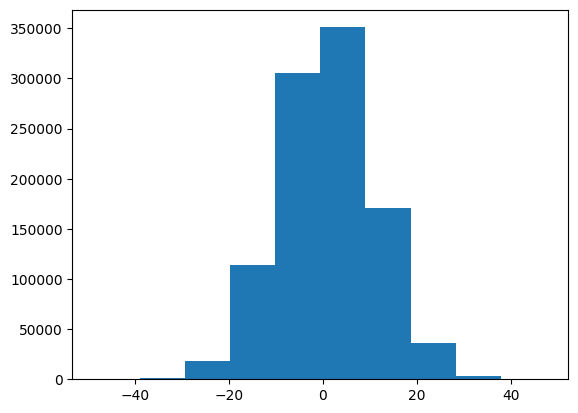

In [4]:
%matplotlib inline
a,n = np.histogram(random,bins=100,density = True)
plt.hist(random)
#To check the normalization is correct -- get the sum of density
print(a.sum())

3. Plot the PDF in a figure. The command `plt.figure()` creates the figure and you can use `plt.plot(a,b)` to plot the variable `b` as a function of `a`. (Beware that the outputs of `np.histogram` do not have the same length as the bins variable gives the edges of the bins and not the centers). You can also plt is log scale on either one of the axis or both using `plt.semilogx(a,b)`, `plt.semilogy(a,b)`, `plt.loglog(a,b)`. If you use the plotting function successively the curves will be superimposed on the same axes. The function `plt.axis` allows one to change the axes limits. `plt.xlim`, `plt.ylim` tune the limits to a single axis. Use `plt.xlabel()` and `plt.ylabel()` for axis labelling.

### If the number of realizations are kept small the shape of the histogram has more fluctuation, and if the bins are increased it has the same effect as now less data is in every bin --- therefore to get the smooth and normal shape -- there shall be a balance between the number of realization and bins.

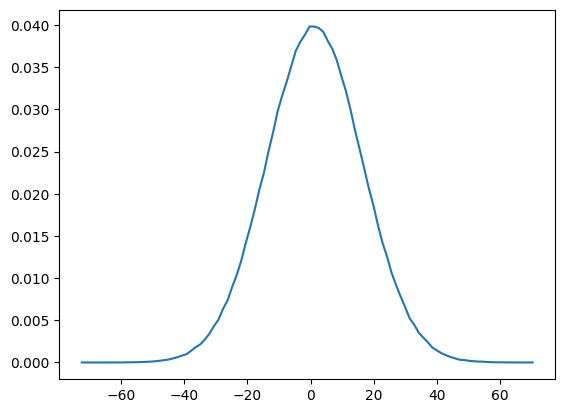

In [5]:
%matplotlib inline
center = (n[0:-1]+n[1:])/2
plt.plot(center,a)
plt.show()

4. Investigate the effect of the number of realizations of the random variable and the number of bins of the histogram. Show a few examples and comment.

In [ ]:
# We can take number of realization and plot every time to get distribution

5. Compute estimates of the centered moments $\langle (a-\langle a\rangle)^p\rangle=\int_{-\infty}^{+\infty}(a-\langle a\rangle)^pP(a)da$ and the normalized moments $\dfrac{\langle (a-\langle a\rangle)^p\rangle}{\langle (a-\langle a\rangle)^2\rangle^{p/2}}$ or to order $p=4$. In python, the power function is for instance `a**4` for the 4th power. The mean function is `np.mean()`. For a float array you can also use the method `a.mean()` which is equivalent to `mean(a)`. There are many other examples of such methods.

Compute theoretically the normalized moment of order 4. **Optional:** Same thing for order 6 moment.

In [49]:
p=2 #std deviation
variance = sigma**2 #
print(variance)
centered_moment_2nd = np.mean((random-np.mean(random))**p)
print(f"2nd centered moment: {centered_moment_2nd}") #must be equal to variance
assert f"variance == centered_moment_2nd , {variance =} ,{centered_moment_2nd=}"
normalization = (np.mean((a-np.mean(random))**2))**(p/2)
normalized_moment_2nd = centered_moment_2nd/normalization
print(f"2nd normalized moment: {normalized_moment_2nd}")

100
2nd centered moment: 99.93123154589065
2nd normalized moment: 103.94217996484335


In [50]:
p=3
centered_moment_3rd = (np.mean(random-np.mean(random))**p) #shall be equal to zero
print(f"3rd centered moment: {centered_moment_3rd}")
normalization = (np.mean((a-np.mean(random))**2))**(p/2)
normalized_moment_3rd = centered_moment_3rd/normalization
print(f"3rd normalized moment: {normalized_moment_3rd}") # its ok if it is negative, it is still less than zero.

3rd centered moment: -4.180614380264159e-48
3rd normalized moment: -4.434819843159003e-48


In [52]:
p=4
kurtosis = 3*sigma**4
print(kurtosis)
centered_moment_4th = np.mean((random-np.mean(random))**p) #shall be equal to zero
print(f"4th centered moment: {centered_moment_4th}")
normalization = (np.mean((a-np.mean(random))**2))**(p/2)
normalized_moment_4th = centered_moment_4th/normalization
print(f"4th normalized moment: {normalized_moment_4th}")

30000
4th centered moment: 29996.33156234133
4th normalized moment: 32452.58589212459


In [53]:
p=5
centered_moment_5th = np.mean((random-np.mean(random))**p) #shall be equal to zero
print(f"5th centered moment: {centered_moment_5th}")
normalization = (np.mean((a-np.mean(random))**2))**(p/2)
normalized_moment_5th = centered_moment_5th/normalization
print(f"5th normalized moment: {normalized_moment_5th}")

5th centered moment: -87.48941930577547
5th normalized moment: -96.53437458916648


In [55]:
p=6
check = 15*sigma**6
print(check)
centered_moment_6th = np.mean((random-np.mean(random))**p) #shall be equal to zero
print(f"6th centered moment: {centered_moment_6th}")
normalization = (np.mean((a-np.mean(random))**2))**(p/2)
normalized_moment_6th = centered_moment_6th/normalization
print(f"6th normalized moment: {normalized_moment_6th}")

15000000
6th centered moment: 15018592.095078541
6th normalized moment: 16900554.971271377


---
### Log normal random variable
We now turn to the lognormal distribution. If $x$ is a lognormal variable then $\log(x)$ is a normal variable. You can generate realizations of the lognormal variable using `np.random.lognormal`. 
1. Read the documentation of the `np.random.lognormal` function. What are the parameters of the distribution ? What is the range of possible values of $x$ ? 

In [6]:
#### syntax = random.lognormal(mean=0.0, sigma=1.0, size=None)
mean_logNorm = 1
sigma_logNorm = 0.5
ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)

2. In the same way as in the questions above, evaluate and display an example of the lognormal PDF. Does the 'mean' parameter change the shape of the PDF ? Does the 'sigma' parameter change the shape ? Show a few examples for different values of the various parameters.

1.0414390590453215


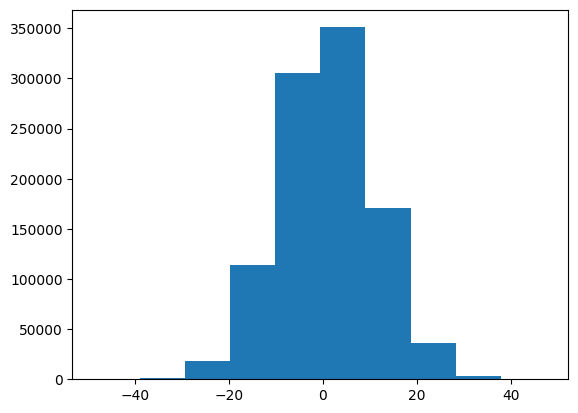

In [7]:
prob_logNorm,bin_num = np.histogram(random,bins=100,density = True)
plt.hist(random)
print(prob_logNorm.sum())

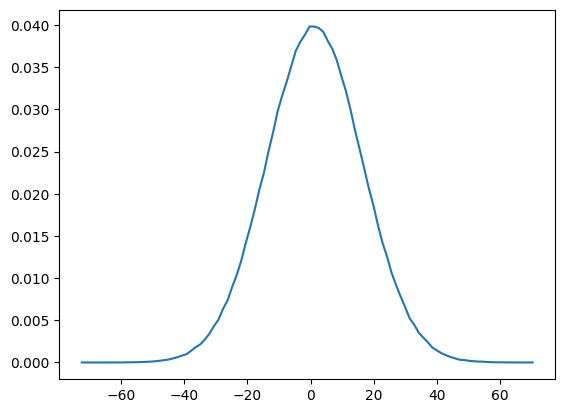

In [8]:
%matplotlib inline
center = bin_num[0:-1]+bin_num[1:]/2
plt.plot(center,prob_logNorm)
plt.show()

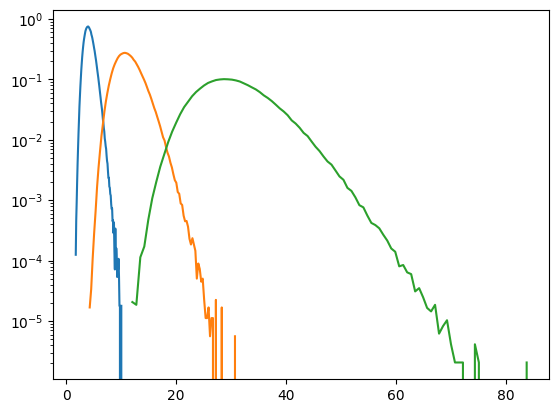

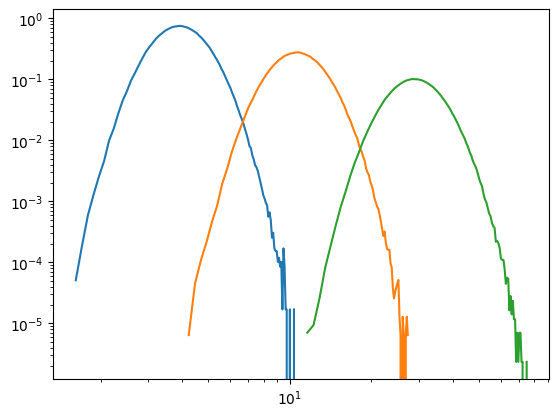

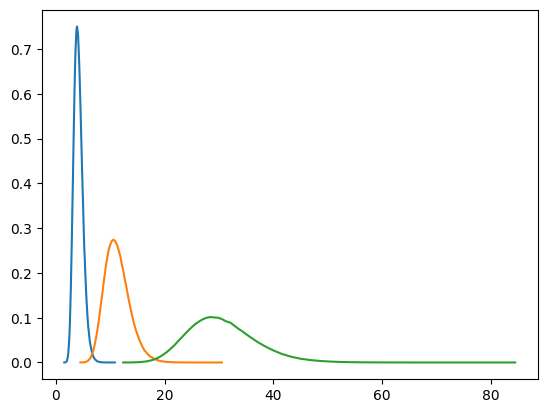

In [11]:
# Changing the mean value 
# log axis -- squeezes the high values and expands the low values
# Question : Whether the mean changes the shape of the pdf? - No it doesnt changes the shape rather
# Answer : 
%matplotlib inline
plt.figure()
for i in range(1,4):
    mean_logNorm = i
    sigma_logNorm = 0.2
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    #plt.plot(center,prob_logNorm)
    plt.semilogy(center,prob_logNorm)

plt.figure()
for i in range(1,4):
    mean_logNorm = i
    sigma_logNorm = 0.2
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    #plt.plot(center,prob_logNorm)
    plt.loglog(center,prob_logNorm)

plt.figure()
for i in range(1,4):
    mean_logNorm = i
    sigma_logNorm = 0.2
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    plt.plot(center,prob_logNorm)
    #plt.loglog(center,prob_logNorm)


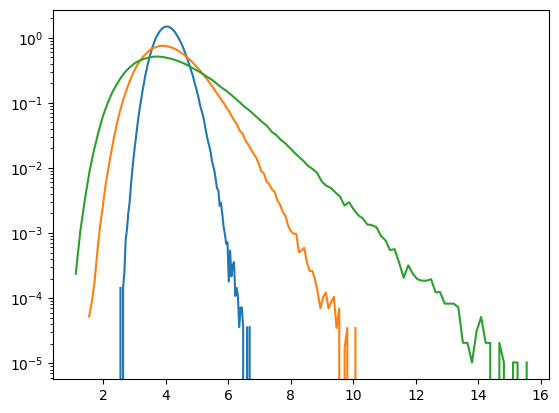

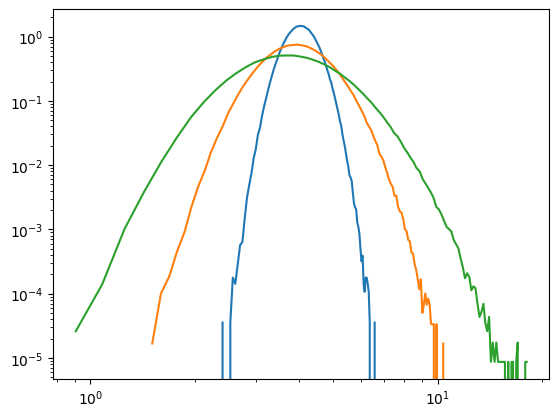

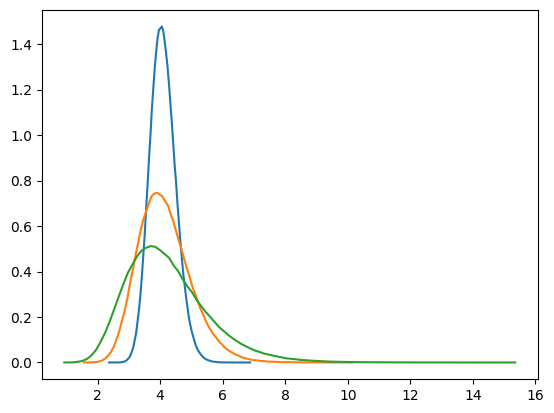

In [13]:
# Changing the value of Sigma - variance
# Question : Whether it changes the shape or not?
# Answer : Yes it changes the shape, as when sigma increases the distribution widens.
%matplotlib inline
plt.figure()
for i in range(1,4):
    mean_logNorm = 1
    sigma_logNorm = i/10
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    #plt.plot(center,prob_logNorm)
    plt.semilogy(center,prob_logNorm)

plt.figure()
for i in range(1,4):
    mean_logNorm = 1
    sigma_logNorm = i/10
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    #plt.plot(center,prob_logNorm)
    plt.loglog(center,prob_logNorm)

plt.figure()
for i in range(1,4):
    mean_logNorm = 1
    sigma_logNorm = i/10
    ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
    prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
    center = bin_num[0:-1]+bin_num[1:]/2
    plt.plot(center,prob_logNorm)
    #plt.loglog(center,prob_logNorm)


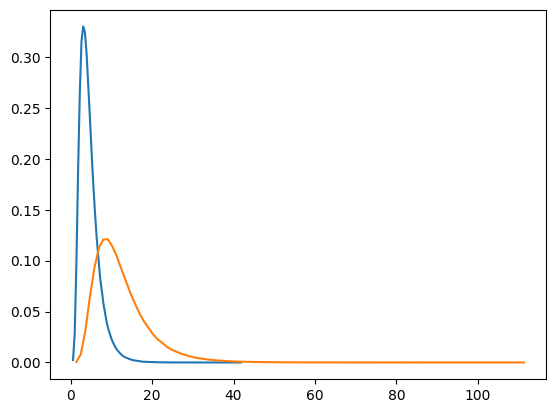

In [74]:
# Extra  -- can be ignored
%matplotlib inline

mean_logNorm = 1
sigma_logNorm = 0.5
ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
center = bin_num[0:-1]+bin_num[1:]/2
plt.figure()
plt.plot(center,prob_logNorm)
mean_logNorm = 2
sigma_logNorm = 0.5
ran_log = np.random.lognormal(mean_logNorm,sigma_logNorm, size=1000000)
prob_logNorm,bin_num = np.histogram(ran_log,bins=100,density = True)
center = bin_num[0:-1]+bin_num[1:]/2
plt.plot(center,prob_logNorm)
#plt.semilogy(center,bin_num)

3. Generate a large number of realisations of a random variable $a$ (zero mean, variance 1) and of a lognormal variable $b$ with zero mean and sigma 0.3 (same large number of realisations). Compute the random variable $c=a\times b$. Compute an estimate of the joint probability $P(b,c)$ using the function `np.histogram2d` (beware of the normalisation). Display $P(b,c)$ in a figure using the function `plt.pcolormesh`. You can use `plt.colorbar()` to show the color scale. 

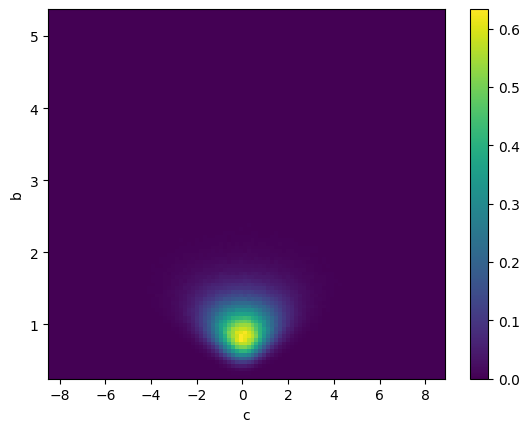

In [18]:
#Joint Probability
a = np.random.normal(0, 1, size=1000000)
b = np.random.lognormal(0, 0.3, size=1000000)
c = a * b
H, eb, ec = np.histogram2d(b, c, bins=(100,100), density=True) # b = 0 axis (y-axis), c = 1 axis
# H is the joint probability distribution , eb and ec are the edges
# if you increase the bins the boxes get smaller, if otherwise.
plt.xlabel("c")
plt.ylabel("b")
plt.pcolormesh(ec, eb, H)
plt.colorbar()
# c can be positive and negative as a(mean = 0) so positive/negative(c) * positive (b)
#

C:\Users\Hammad\AppData\Local\Temp\ipykernel_5256\2512976536.py:6: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(ec, eb, np.log(H)) # because of log(H) all the negative probabilities are removed


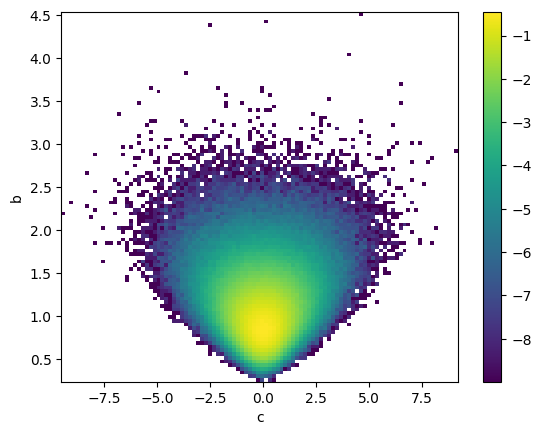

In [25]:
a = np.random.normal(0, 1, size=1000000)
b = np.random.lognormal(0, 0.3, size=1000000) # cannot be negative
c = a * b
H, eb, ec = np.histogram2d(b, c, bins=(100,100), density=True) # b = 0 axis (y-axis), c = 1 axis )
#X, Y = np.meshgrid(xedges, yedges)
plt.pcolormesh(ec, eb, np.log(H)) # because of log(H) all the negative probabilities are removed
#plt.pcolormesh(ec, eb, H)
plt.xlabel("c")
plt.ylabel("b")
plt.colorbar()
# white space is probability = 0 and log of 0 is infinity
# we see that the decay is very fast as their is non-uniformity in color suddenly

4. From your estimate of $P(b,c)$ compute estimates of $P(b)$ and $P(c)$. You may use the `np.sum` to sum on whichever axis (see documentation).

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


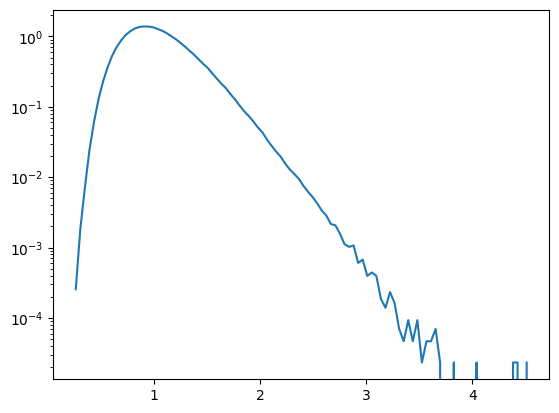

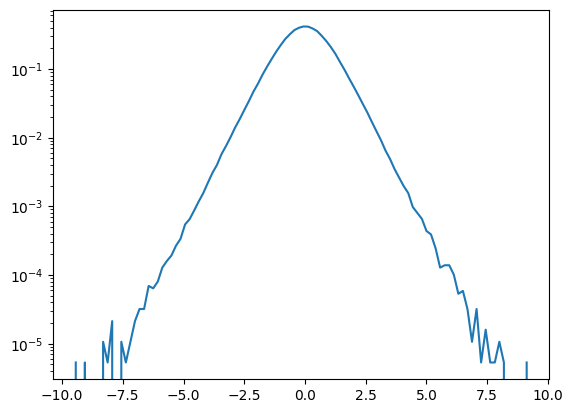

In [29]:
# Marginal probability
nbb = np.sum(H,axis=1)*(ec[1]-ec[0]) # axis =1 means x-axis, i.e integrating along c # for maginal probability of b
ncc = np.sum(H,axis=0)*(eb[1]-eb[0]) # axis =0 means y-axis, i.e integrating along b # for marginal probability of c
ebcen = (eb[0:-1]+eb[1:])/2  # center for bins in the direction on which b is
eccen = (ec[0:-1]+ec[1:])/2  # center for bins in the direction on which c is
plt.figure()
plt.semilogy(ebcen,nbb) # x,y axis
plt.figure()
plt.semilogy(eccen,ncc)

5. How can one get the conditionnal probability $P(b|c)$ or $P(c|b)$ from the previous quantities ? Show an example.

In [ ]:
# conditional probabiliy

6. Are the variables $b$ and $c$ statistically independent ? What quantity should one compute to prove it ? Show this quantity in a figure (use the vmin and vmax parameters in `pcolormesh` to restrict the color range between 0 and 5)

In [ ]:
# Independent variables
# from colour map we can identify that the variables are not independent

---
# Random signals
### Gaussian white noise
Let us consider a realisation of a normal variable (say, 1000 points). Let us consider it as a signal $a(t)$ or rather $a[n]$ since the 'time' is discrete. One can consider it as one realization of a random process. This process is a Gaussian white noise.  
1. Is the Gaussian white noise a stationary process ? How can you numerically show it ? Detail your reasoning.

In [47]:
sum = np.zeros(10000,)
Nr = 10000 # this takes the factor of time
for i in range(0,Nr):
    random = np.random.normal(0,1, size=10000)
    sum+=random**2 
sum = sum/Nr
    #print(f"average: {average}")
print(sum[0:10]) # so we can see that the mean does not change
    

[0.99252482 1.00584528 0.97923986 0.97868704 0.98259228 1.0010955
 0.99893262 1.03090467 0.99365378 0.99931235]


(0.0, 1.4)

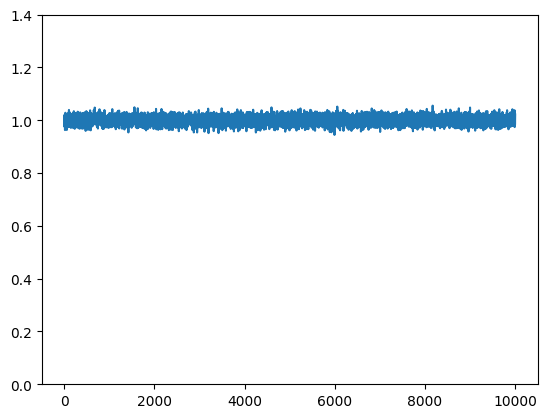

In [45]:
plt.figure()
plt.plot(sum)
plt.ylim(0,1.4)

2. Compute an estimate of the correlation function of the Gaussian white noise. You can use the function 
`sig.correlate` (do not use `np.correlate` which is totally inefficient). Beware of what the function is computing to normalize correctly the correlation. Show the result in a figure and comment. The function `np.linspace` may be useful.

In [ ]:
x=np.random.normal(0,1, size=1000000)
covar = sig.correlate(x,x) # its correlation
np.linspace

3. Let us investigate the random process $b[n]$ made of the discrete integral of the Gaussian random noise $a[n]$. Such as $b[n]=\sum_{k=0}^na[k]$. You should use the function ``np.cumsum``. Compute and show the temporal evolution of the moments $M_p[n]=\langle b[n]^p\rangle$ for $p=1,2$. Is the $b$ process stationary ?

[-0.00164352 -0.00234637 -0.0182761  ...  0.67579072  0.66811019
  0.66407614]


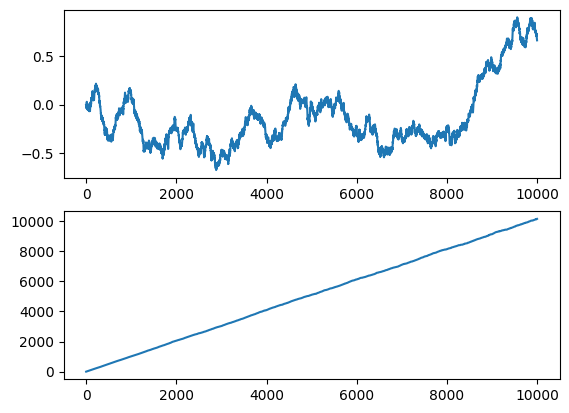

In [51]:
b2 = b1 = np.zeros(10000,)
Nr = 10000 # this is the number of
for i in range(0,Nr):
    a = np.random.normal(0,1, size=10000) # 10000 is the time
    b = np.cumsum(a) # sum of a  -- 1 realization
    b1+=b
    b2 = b2 + b**2
b1 = b1/Nr    
b2 = b2/Nr
plt.figure()
ax = plt.subplot(211)
plt.plot(b1)
ax = plt.subplot(212)
plt.plot(b2)
# plt.ylim(0,1.4)
print(b1)

---
### Langevin model
We now turn to the study of the Langevin process that was invented to model the Brownian motion. A tiny (micronic) solid bead is immersed in a viscous liquid. Fluid melocules have a random motion due to thermal agitation and collide with the bead. Thus the motion of the bead is itself random. Because of viscosity, the bead also experience a viscous damping force (Stokes force). With these ingredients one ends up with a differential equation for the velocity of the bead (in 1D):
$$ \frac{dv}{dt}=-\gamma v + b(t) $$
where $\gamma$ is the viscous damping factor and $b(t)$ is a Gaussian white noise of zero mean that mimics the action of the fluid molecules (See the book by Van Kampen, *Stochastic Processes in Physics and Chemistry*).
1. Assuming that one can manipulate the Gaussian white noise as a regular function (which is not true in general beware!), show analytically that the solution of this differential equation with $v(0)=v_0$ is:
$$v(t)=v_0e^{-\gamma t}+e^{-\gamma t}\int_0^t e^{\gamma s}b(s)ds$$
2. Let us write $\langle b^2\rangle=\sigma^2$. Show analytically that the variance of $v$ follows:
$$\langle v(t)^2\rangle=v_0^2e^{-2\gamma t}+\frac{\sigma^2}{2\gamma}(1-e^{-2\gamma t})$$
3. Is this process stationary ?

In [ ]:
# No it isnt as the mean and variance depends on time.

4. We assume that the time step $dt=1$. Compute one realization of 2000 time steps of a discrete version of the Langevin process using the simplest discrete estimate of the time derivative. Use $v_0=10$, $\gamma=1/100$, $\sigma=1$. Show this realization in a figure.

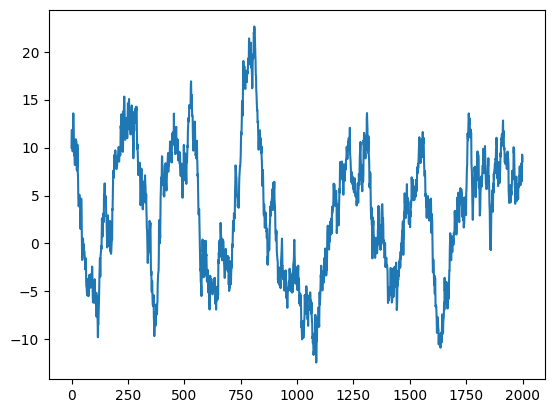

In [59]:
N = 2000
vo = 10
gamma = 1/100
sigma =1
v = np.zeros(N)
v[0]=vo
b = np.random.normal(0,sigma,N)
for i in range(1,N):
    v[i] = (1-gamma)*v[i-1]+b[i]
plt. figure()
plt.plot(v)


5. Compute a numerical estimate of $\langle v(t)^2\rangle$ over 2000 time steps. Is this estimate consistent with the theretical prediction ? Show a comparison on a figure.

(0.0, 2000.0, 0.0, 100.0)

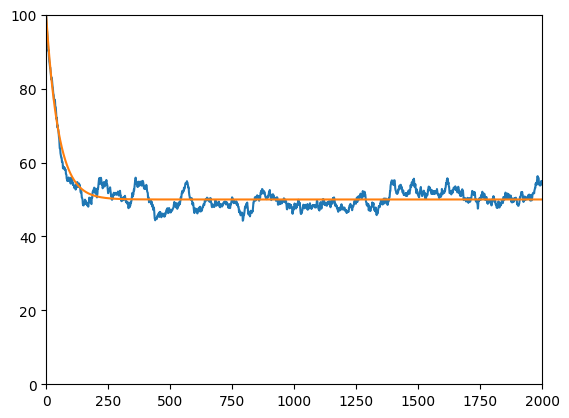

In [68]:
t = 2000 # time
N = 1000 # number of realization
vo = 10
gamma = 1/100
sigma = 1
a = np.zeros(t) # Realization Vector
for n in range (1,N): # generating loop of number of realization
    v = np.zeros(t)
    v[0] = vo
    b = np.random.normal(0,sigma,t)
    for i in range(1,t):
        v[i] = (1-gamma)*v[i-1]+b[i]
    a = a + v**2
a = a/N
t= np.linspace(0,t-1,t)
v2t = vo**2 * (np.exp(-2*gamma*t)) + ((sigma**2)/(2*gamma)) * (1-np.exp(-2*gamma*t))
plt.figure()
plt.plot(a)
plt.plot(v2t)
plt.axis([0,2000,0,100])
        

From the theoretical prediction of $\langle v(t)^2\rangle$, one sees that the variance decays exponentially on a time scale comparable to $1/\gamma$. Thus after a time equal to a few times $1/\gamma$ (let us say 5 times) the signal can be considered as stationary and having forgotten the initial value $v_0$. This stationary process is called the Orstein-Uhlenbeck process. A way to generate an Orstein-Uhlenbeck process is to pick the value of $v_0$ following a normal distribution of variance $\sigma_0^2=\sigma^2/2\gamma$

6. Compute one realisation of the Orstein-Uhlenbeck process of variance 1 (2000 time steps). What should be the parameter $\sigma$ to ensure that the variance is 1 ?

C:\Users\Hammad\AppData\Local\Temp\ipykernel_12748\2645926944.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1)


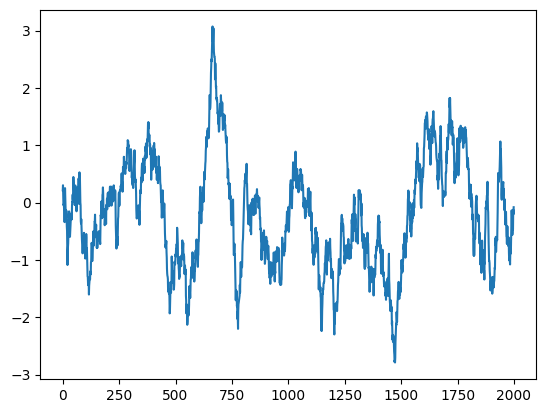

In [4]:
N = 2000
gamma = 1/100
sigma =np.sqrt(2*gamma)
v=np.zeros(N)
v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1)
b = np.random.normal(0,sigma,N)
for i in range(1,N):
    v[i] = (1-gamma)*v[i-1]+b[i]
plt.figure()
plt.plot(v)

7. Show numerically that the process is statistically stationary and of variance 1.

8. Using a long realisation of the Urstein-Uhlenbeck process (1 million timesteps ?), compute a numerical estimate of the PDF of this process. Can you guess what is the theoretical distribution ?

C:\Users\Hammad\AppData\Local\Temp\ipykernel_14400\3710439.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1) # initializing th initial condition, if you dont setup the initial condition with this variance, the process wont be stationary.


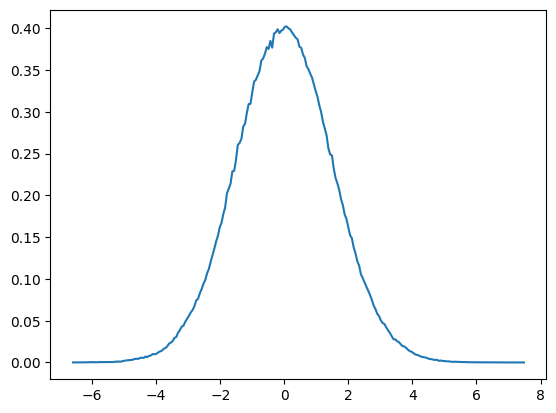

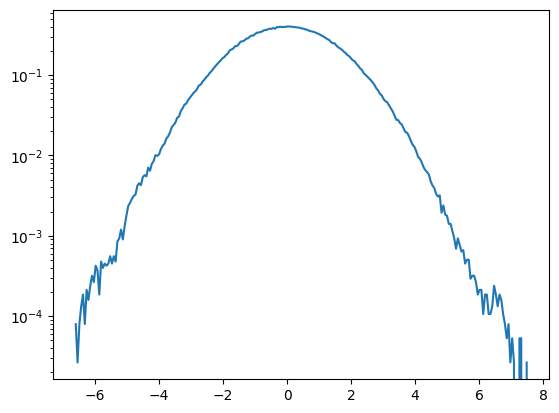

In [8]:
N = 1000000 # number of steps
gamma = 1/100
sigma =np.sqrt(2*gamma)
v=np.zeros(N)
v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1) # initializing th initial condition, if you dont setup the initial condition with this variance, the process wont be stationary.
b = np.random.normal(0,sigma,N)
for i in range(1,N):
    v[i] = (1-gamma)*v[i-1]+b[i]
dis,bin_num = np.histogram(v,bins=250,density = True)
center = bin_num[0:-1]+bin_num[1:]/2
plt.figure()
plt.plot(center,dis)
plt.figure()
plt.semilogy(center,dis)


Answer: The 2nd graph is just representation of gausian in a semilog scale, so when you take semilog of gausian distribution you achieve a parabola, this is important if we want to visualize the extremes.

9. Compute the correlation function of this process. Is it consistent with the theoretical prediction below ?
$$\langle v(t)v(t+\tau) \rangle=\frac{\sigma^2}{2\gamma}e^{-\gamma |\tau|}$$
Show the comparison in a figure.

Correlation estimator, gives you idea about the limits of how much points(in time) you shift and you`ll loose the information

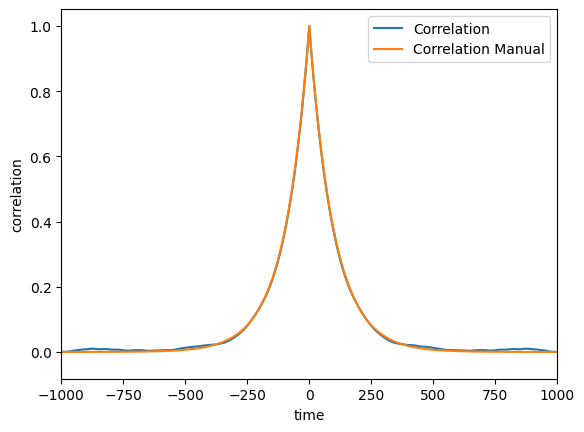

In [41]:
tau = np.linspace(-N+1,N-1,2*N-1)
covar = sig.correlate(v,v)/N # normalization 
plt.figure()
plt.plot(tau,covar , label='Correlation')
plt.xlim(-1000,1000)

covar_man =(sigma**2/(2*gamma))*(np.exp(-gamma*np.abs(tau)))
plt.plot(tau,covar_man, label='Correlation Manual')
plt.xlim(-1000,1000)
plt.xlabel("time")
plt.ylabel("correlation")
plt.legend()

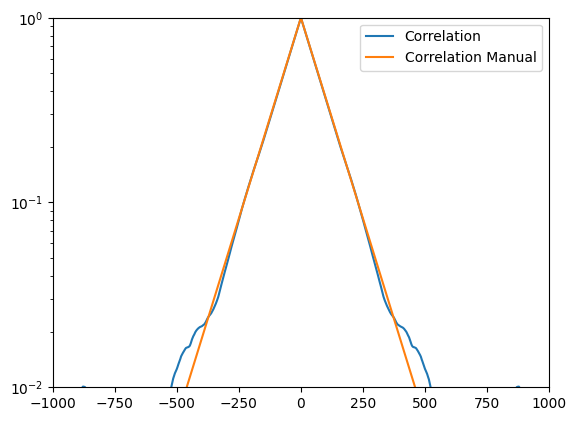

In [44]:
plt.figure()
plt.semilogy(tau,covar,label='Correlation')
plt.semilogy(tau,covar_man, label='Correlation Manual')
plt.ylim(1e-2,1) # thats like a zoom in thing
plt.xlim(-1000,1000) # thats like a zoom in thing
plt.legend()

10. A frequently used definition of the characteristic time scale of a stationnary signal (correlation time) is:
$$T=\frac{1}{\langle v^2\rangle}\int_0^\infty \langle v(t)v(t+s)\rangle ds$$
(It is not the only way to define a characteristic time...)

Using the simplest way to estimate the integral, compute $T$ (you may have to restrict the interval of summation for accuracy). What is the theoretical prediction for $T$ ? Is it consistent with your estimate ?

In [54]:
print(covar.shape)

(1999999,)


In [49]:
T = sum(covar[N:])
print(T)
T = sum(covar[N :N+500])
print(T)

4.314281354129298
98.43425935589833


---
# Spectral analysis
We will now investigate the spectral properties of the processes studied above: Gaussian white noise, Orstein-Uhlenbeck process. 

1. Generate one realisation of the Gaussian white noise. Compute the Fourier Transform (using the `fft` function from `numpy.fft.fft`). Plot the real part and imaginary part in a figure. 


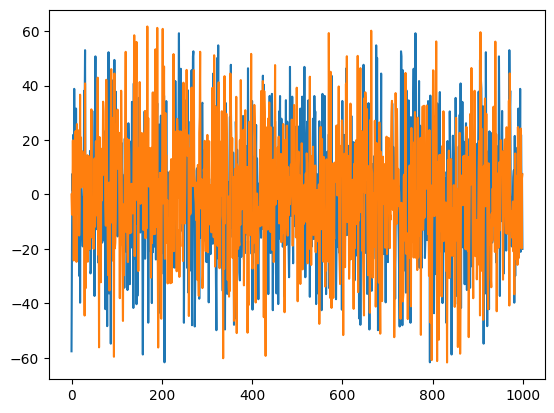

In [74]:
random = np.random.normal(0,1, size=1000)
b = np.fft.fft(random) # it gives the complex part
plt.figure()
plt.plot(b.real)
plt.plot(b.imag)

The Fourier transform of the Gaussian white noise is also a random process.

2. For the Gaussian white noise $a[n]$ compute a numerical estimate of $\langle |\hat a[f]|^2\rangle$ where $\hat a[f]$ is the Fourier transform of $a[n]$. Show the result in a figure. Comment on the spectrum of the white noise.

3. Generate a long realization of the Orstein Uhlenbeck process similar to the one above. Use the `sig.welch` function to estimate the Fourier power spectrum density (PSD). Read the documentation! Beware of the option to normalize is correctly. Use a hanning window. Use a long enough segment length. Overlap is typically half the segment length. Nfft is usually the same as the segment length.

The theoretical spectrum (using the same normalisation convention) is:
$$S(f)=\frac{2\sigma^2}{\gamma^2+(2\pi f)^2}$$
Is the numerical estimate consistent with the prediction ?

C:\Users\Hammad\AppData\Local\Temp\ipykernel_14400\232356673.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1) # initializing th initial condition, if you dont setup the initial condition with this variance, the process wont be stationary.


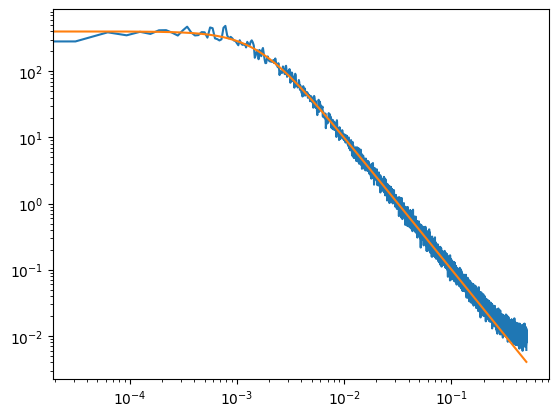

In [86]:
N = 1000000 # number of steps
gamma = 1/100
sigma =np.sqrt(2*gamma)
v=np.zeros(N)
v[0] = np.random.normal(0,np.sqrt(sigma**2/2/gamma),1) # initializing th initial condition, if you dont setup the initial condition with this variance, the process wont be stationary.
b = np.random.normal(0,sigma,N)
for i in range(1,N):
    v[i] = (1-gamma)*v[i-1]+b[i]
Nfft = 32000
f,Pxx = sig.welch(v,fs=1.0,window='hann', nperseg=Nfft, noverlap = nperseg // 2, nfft=Nfft) # f = sampling frequncy. Pxx = power density
plt.loglog(f,Pxx)

s = 2*(sigma**2)/(gamma**2+(2*np.pi*f)**2)
plt.loglog(f,s)

4. What is the cutoff frequency ?